# MLP in Titanic

## Load Data

In [0]:
!pip install xlrd

In [0]:
import os
import urllib
url = "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"
filepath = "titanic3.xls"

if not os.path.isfile(filepath):
  result = urllib.urlretrieve(url, filepath)

In [0]:
import numpy
import pandas as pd

In [0]:
all_df = pd.read_excel(filepath)

In [0]:
all_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [0]:
# features selection
cols = ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
all_df = all_df[cols]
all_df.head()

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S


## Data pre-process

In [0]:
all_df.isnull().sum()

survived      0
name          0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [0]:
from sklearn import preprocessing
def PreprocessData(raw_df):
  # 1.drop name cols
  df = all_df.drop(['name'], axis=1) 
  
  # 2. change null values into average values
  age_mean = df['age'].mean() # find average
  df['age'] = df['age'].fillna(age_mean)

  fare_mean = df['fare'].mean()
  df['fare'] = df['fare'].fillna(fare_mean)
  
  # 3. change sex to binary value 
  df['sex'] = df['sex'].map({'female': 0, 'male': 1}).astype(int)
  
  # 4.Encoding embarked with One-Hot Encoding
  x_OneHot_df = pd.get_dummies(data = df, columns=['embarked'])
  
  # 5. Convert Dataframe to Array
  ndarray = x_OneHot_df.values
  
  Label = ndarray[:, 0]
  Features = ndarray[:, 1:]
  # 6.Normalization
  minmax_scale = preprocessing.MinMaxScaler()
  scaledFeatures = minmax_scale.fit_transform(Features)
  
  return scaledFeatures, Label

In [0]:
# spilt data
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

print('trian:', len(train_df), 'test:', len(test_df))

train_Features, train_Label = PreprocessData(train_df)
test_Features, test_Label = PreprocessData(test_df)

('trian:', 1042, 'test:', 267)


In [0]:
train_Label[:3]

array([1., 1., 0.])

## Training Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(input_dim = 9, units=40, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(units=30, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(units=1,kernel_initializer='glorot_uniform', activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
train_history = model.fit(x = train_Features, y = train_Label, validation_split=0.1, epochs=30, batch_size=30, verbose=2)

Train on 1178 samples, validate on 131 samples
Epoch 1/30
 - 1s - loss: 0.6560 - acc: 0.5917 - val_loss: 0.5245 - val_acc: 0.7863
Epoch 2/30
 - 0s - loss: 0.5877 - acc: 0.6570 - val_loss: 0.4645 - val_acc: 0.7863
Epoch 3/30
 - 0s - loss: 0.5324 - acc: 0.7852 - val_loss: 0.4463 - val_acc: 0.8092
Epoch 4/30
 - 0s - loss: 0.4961 - acc: 0.7852 - val_loss: 0.4264 - val_acc: 0.8092
Epoch 5/30
 - 0s - loss: 0.4814 - acc: 0.7818 - val_loss: 0.4236 - val_acc: 0.8092
Epoch 6/30
 - 0s - loss: 0.4733 - acc: 0.7844 - val_loss: 0.4182 - val_acc: 0.8092
Epoch 7/30
 - 0s - loss: 0.4680 - acc: 0.7895 - val_loss: 0.4121 - val_acc: 0.8244
Epoch 8/30
 - 0s - loss: 0.4639 - acc: 0.7895 - val_loss: 0.4166 - val_acc: 0.8168
Epoch 9/30
 - 0s - loss: 0.4592 - acc: 0.7903 - val_loss: 0.4104 - val_acc: 0.8397
Epoch 10/30
 - 0s - loss: 0.4571 - acc: 0.7852 - val_loss: 0.4085 - val_acc: 0.8397
Epoch 11/30
 - 0s - loss: 0.4546 - acc: 0.7920 - val_loss: 0.4120 - val_acc: 0.8397
Epoch 12/30
 - 0s - loss: 0.4530 - acc

1309/1309 [==============================] - 0s 61us/step


[0.4345591517237874, 0.8082505730475242]

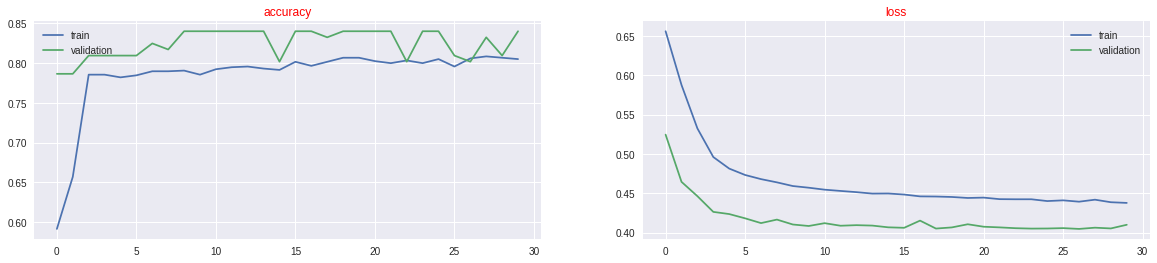

In [0]:
import matplotlib.pyplot as plt
def show_history(train_history):
  fig, (ax, ax1) = plt.subplots(1, 2)
  fig.set_size_inches((20, 4))
  ax.plot(train_history.history['acc'], label = 'train')
  ax.plot(train_history.history['val_acc'], label ='validation')
  ax.legend(loc=2)
  ax.set_title('accuracy', color='r')
  
  ax1.plot(train_history.history['loss'], label = 'train')
  ax1.plot(train_history.history['val_loss'], label ='validation')
  ax1.legend(loc=1)
  ax1.set_title('loss', color='r')
  
show_history(train_history)
scores = model.evaluate(test_Features, test_Label, verbose=1)
scores

## Observation

In [0]:
all_Features, Label = PreprocessData(all_df)
all_probability = model.predict(all_Features)
all_df.insert(len(all_df.columns), 'probability', all_probability)

In [0]:
all_df.head()

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.977021
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.668193
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.976728
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.380730
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.976196


In [0]:
# 女生的生存數量比較多，因為當初女性優先
print( len(all_df[ (all_df['survived'] == 1) & (all_df['sex']=='male') ]) ,  len(all_df[ (all_df['survived'] == 1) & (all_df['sex']=='female') ]))

(161, 339)


In [0]:
# Find who survived probability > 0.9 but still not survived
all_df[ (all_df['survived'] == 0) & (all_df['probability'] > 0.9) ]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.976728
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.976196
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.983485
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.978377
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.937352


In [0]:
# In above code cell, we find the fact that Allison Family have high survived probability but still died, we want to figure out the reason. 
# 真實故事中，Allision全家為了尋找未滿一歲的嬰兒而不願搭乘救生艇而沈船，所幸最後嬰兒被其他人救出
Is_Allison_Family = all_df['name'].str.contains('Allison')
all_df[Is_Allison_Family]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.55,S,0.668193
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.55,S,0.976728
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.55,S,0.380730
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.55,S,0.976196
